  
### TP02 <br>
  
### Cours : INF8100 - Concepts et tech. fouille et expl. de données 
  
### Travail remis à 
### Petko Valtchev  
### Nom : Balde 
### Prénom : Abdoulaye	 
### Code permanent : BALA17269605 
### Courriel : balde.abdoulaye.4@courrier.uqam.ca 
 
### Nom : NIANG
### Prénom : Khadim	 
### Code permanent :NIAK12339405 
### Courriel :niang.khadim@courrier.uqam.ca
 
### Nom : Mboumba 
### Prénom : Moustapha Adrien
### Code permanent : MBOM17289900 
### Courriel : Mboumba.moustapha_adrien@courrier.uqam.ca


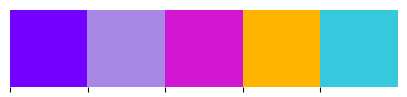

In [1]:
import pandas as pd
import polars as pl
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (
    mean_squared_error,
    r2_score,
    accuracy_score,
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
)
# import jupyter_black
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# jupyter_black.load()

# Color Palette
custom_colors = ["#7400ff", "#a788e4", "#d216d2", "#ffb500", "#36c9dd"]
sns.palplot(sns.color_palette(custom_colors))

warnings.filterwarnings("ignore")

sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)

# Set tick size
plt.rc("xtick", labelsize=12)
plt.rc("ytick", labelsize=12)

In [2]:
# df = pd.read_excel("https://raw.githubusercontent.com/abdoulayegk/INF8100/refs/heads/main/winequality.xlsx")
df = pd.read_excel("winequality.xlsx")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [3]:
df.shape

(6497, 13)

# 1. Régression linéaire (8 pts)

### Q1. Commençons par un cas simple, la prédiction du SO₂ total en fonction du SO₂ libre.

L’objectif de la régression linéaire est de prédire une variable continue (par exemple, la densité du vin) à partir d’un
ensemble de variables explicatives quantitatives (acidité, sucre résiduel, alcool, etc.)
1. Commençons par un cas simple, la prédiction du SO₂ total en fonction du SO₂ libre.
* Comment se présente la relation entre le dioxyde de soufre total et le dioxyde de soufre libre ? Est-elle
linéaire ?
* Quel est le coefficient de détermination (R²) ? La variable « free sulfur dioxide » explique-t-elle une grande
partie de la variance du « total sulfur dioxide » ?
* Quelle est la signification du coefficient de régression associé au « free sulfur dioxide » ? Autrement dit, de
combien augmente en moyenne le total sulfur dioxide lorsque le « free sulfur dioxide » augmente d’une
unité ?
* Faites-en une visualisation du nuage de points dans l’espace valeur réelle x valeur prédite, en dessinant la
droite des prédictions parfaites. Que peut-on observer ?
* Le modèle pourrait-il être amélioré en ajoutant d’autres variables ?

In [4]:
df.columns = [col.replace(" ", "_") for col in df.columns]
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [5]:
df.isna().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

In [6]:
df["type"].unique()

array(['red', 'white'], dtype=object)

In [7]:
df["type"] = df["type"].map({"red": 0, "white": 1})
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


### Verifions et supprimons si ca existe les doublons avant de construire un modèle est une étape importante pour plusieurs raisons :
1. Éviter les biais dans le modèle
2. Réduire le surapprentissage
3. Améliorer les performances


In [8]:
# to check if there is any duplicates
print(df.duplicated().any())

True


Le resultat nous montre qu'on a des doublons donc on va les supprimer.

In [9]:
df = df.drop_duplicates()
df.shape

(5320, 13)

On avais **(6497 lignes, 13 colonnes)** avant et maintenant on se retrouve avec:**(5320 lignes, 13 colonnes)**

### 1. Commençons par un cas simple, la prédiction du SO₂ total en fonction du SO₂ libre.

In [10]:
# 1. Analyse de la relation entre SO₂ total et SO₂ libre
X = df["free_sulfur_dioxide"].values.reshape(-1, 1)
y = df["total_sulfur_dioxide"].values

# Separation des donnees
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

lr_sample = LinearRegression()
lr_sample.fit(X_train, y_train)
y_pred = lr_sample.predict(X_test)

### * Comment se présente la relation entre le dioxyde de soufre total et le dioxyde de soufre libre ? Est-elle lineaire

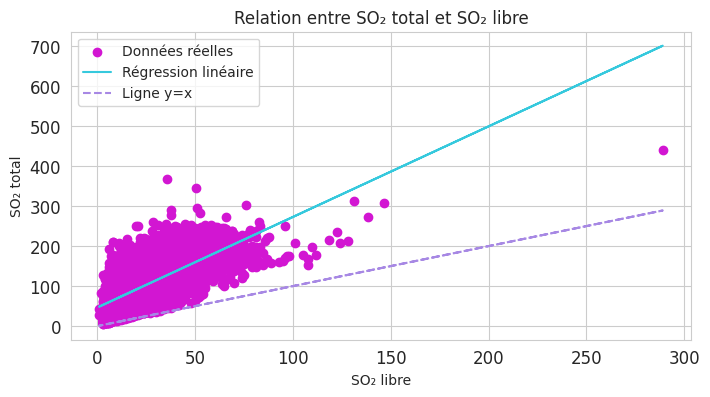

In [11]:
# Création de la visualisation
plt.figure(figsize=(8, 4))
plt.scatter(X, y, color=custom_colors[2], label="Données réelles")
plt.plot(X, lr_sample.predict(X), color=custom_colors[4], label="Régression linéaire")
plt.plot(X, X, "--", color=custom_colors[1], label="Ligne y=x")
plt.xlabel("SO₂ libre")
plt.ylabel("SO₂ total")
plt.title("Relation entre SO₂ total et SO₂ libre")
plt.legend()

Le graphique montre une corrélation positive entre le SO2 total et le SO2 libre. Cela signifie que lorsque la quantité de SO2 libre augmente, la quantité totale de SO2 augmente également.  
On peut dire que la relation entre le SO2 total et le SO2 libre est linéaire, avec une certaine dispersion des données.


### * Quel est le coefficient de détermination (R²) ? La variable « free sulfur dioxide » explique-t-elle une grande partie de la variance du « total sulfur dioxide » ?


In [12]:
r2_sm = r2_score(y_test, y_pred)
print(f"Le resultat du  R^2 = {r2_sm:.2f}")

Le resultat du  R^2 = 0.52


Avec un $R^2 = 0.52$, cela signifie que **52 % de la variance** de la variable dépendante (**total sulfur dioxide**) est expliquée par la variable indépendante (**free sulfur dioxide**) dans le cadre de ce modèle de régression.

Le coefficient de détermination (R²) est 0.52. Cela signifie que 52% de la variance du "total sulfur dioxide" est expliquée par le "free sulfur dioxide" dans le cadre de ce modèle de régression. Donc il explique une grande partie partie du total sulfur dioxide avec un coefficient de 2.256.


### * Quelle est la signification du coefficient de régression associé au « free sulfur dioxide » ? Autrement dit, decombien augmente en moyenne le total sulfur dioxide lorsque le « free sulfur dioxide » augmente d’une unité ?

In [13]:
# Affichage des résultats
# print(f"Coefficient de determination (R²): {r2:.3f}")
print(f"Coefficient de régression: {lr_sample.coef_[0]:.3f}")
print(f"Ordonnée à l'origine: {lr_sample.intercept_:.3f}")

Coefficient de régression: 2.265
Ordonnée à l'origine: 46.296


Dans votre modèle, le coefficient de régression associé au "free sulfur dioxide" est de 2.265. Cela signifie que si on augmente la quantité de dioxyde de soufre libre d'une unité on va attendre à ce que la quantité totale de dioxyde de soufre augmente en moyenne de 2.265 unités. Lorsque la quantité de "free sulfur dioxide" augmente d'une unité, la quantité de "total sulfur dioxide" augmente en moyenne de 2.265 unités.

### * Faites-en une visualisation du nuage de points dans l’espace valeur réelle x valeur prédite, en dessinant la droite des prédictions parfaites. Que peut-on observer ?

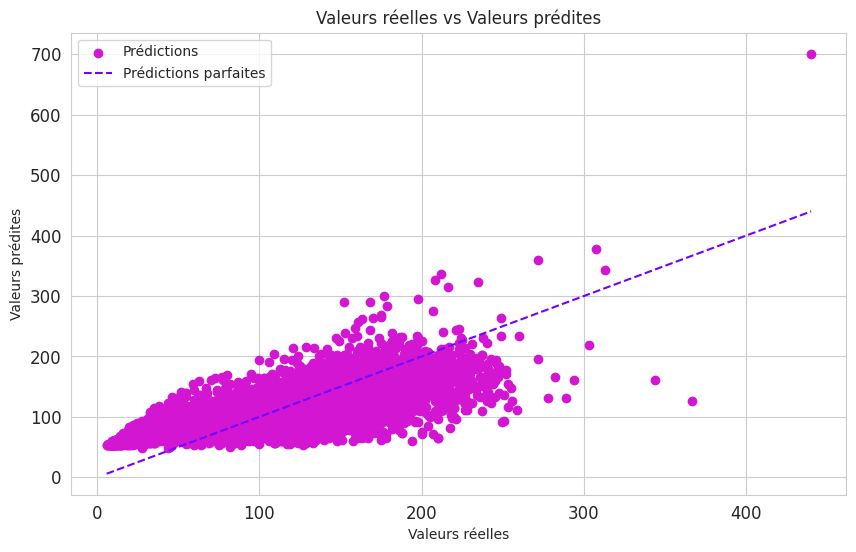

In [14]:
# Création du graphique valeurs réelles vs prédites
y_pred = lr_sample.predict(X)
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, color=custom_colors[2], label="Prédictions")
plt.plot(
    [y.min(), y.max()],
    [y.min(), y.max()],
    "--",
    color=custom_colors[0],
    label="Prédictions parfaites",
)
plt.xlabel("Valeurs réelles")
plt.ylabel("Valeurs prédites")
plt.title("Valeurs réelles vs Valeurs prédites")
plt.legend()

# Analyse des corrélations avec les autres variables
# correlation_matrix = df.corr()
# print("\nCorrélations avec total_sulfur_dioxide:")
# print(correlation_matrix['total_sulfur_dioxide'].sort_values(ascending=False))

Le graphique montre une corrélation positive entre les valeurs réelles et les valeurs prédites. Cela indique que le modèle capture une bonne partie de la relation entre les variables. Cependant, l'écart par rapport à la droite de prédiction parfaite suggère que certaines prédictions pourraient être améliorées.


### * Le modèle pourrait-il être amélioré en ajoutant d’autres variables ?
La reponse est oui si les varaibles sont relevante elle peuvent 

Oui, le modèle peut être amélioré en :
1. Ajoutant des variables pertinentes pour capturer davantage de variance dans les données.
2. Augmentant le volume de données pour permettre au modèle d'apprendre des patterns plus complexes.
3. Explorant des transformations ou des interactions entre les variables existantes.


# Q2. Passons à la régression linéaire multiple, avec la prédiction de la densité depuis le sucre résiduel et l’alcool.
* Le modèle linéaire multiple pour la densité comme fonction du sucre résiduel et de l’alcool fournit-il un bon ajustement ? Quel est le R² et que nous apprend-il sur la qualité de la prédiction ?
* Comment interpréter les coefficients associés au sucre résiduel et à l’alcool, respectivement ? Par exemple, un accroissement du sucre résiduel conduit-il à une augmentation ou une diminution de la densité, et dans quelle proportion ? De même pour l’alcool.
* Faites-en une visualisation du nuage de points dans l’espace valeur réelle x valeur prédite, en dessinant la droite des prédictions parfaites. Que peut-on observer ?
* Les résidus (valeur réelle - valeur prédite) du modèle indiquent-ils des problèmes potentiels (non-linéarité, valeurs aberrantes, etc.) ? Affichez-les autour de la ligne de résidus zéro (prédiction parfaite) et observez.

In [15]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,0


In [16]:
# Selection de variable X et y
X = df[["residual_sugar", "alcohol"]]
y = df.density

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

lr_mult = LinearRegression()
lr_mult.fit(X_train, y_train)

y_pred_mult = lr_mult.predict(X_test)

# R^2
score_r2 = r2_score(y_test, y_pred_mult)
print(f"Le resultat du regression lineaire multiple  R^2 = {score_r2:.2f}")

print("\nCoefficients:")
print(f"Sucre résiduel: {lr_mult.coef_[0]:.6f}")
print(f"Alcool: {lr_mult.coef_[1]:.6f}")

Le resultat du regression lineaire multiple  R^2 = 0.53

Coefficients:
Sucre résiduel: 0.000243
Alcool: -0.001392


### Interprétation des coefficients :

* **Pour le sucre résiduel :** un coefficient positif indique qu'une augmentation du sucre résiduel entraîne une augmentation de la densité **(Sucre résiduel: 0.000243)**
* **Pour l'alcool :** un coefficient négatif indique qu'une augmentation de l'alcool entraîne une diminution de la densité **(Alcool: -0.001392)**

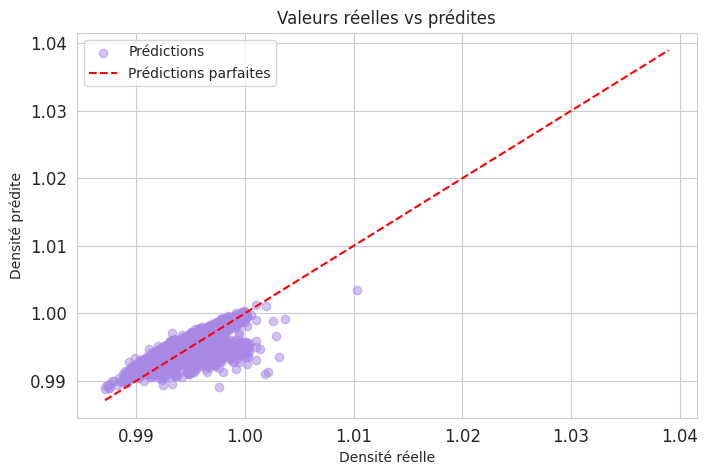

In [18]:
# Création des visualisations
plt.figure(figsize=(8, 5))

# 1. Nuage de points des valeurs réelles vs prédites
plt.scatter(y_test, y_pred_mult, alpha=0.5, color=custom_colors[1], label="Prédictions")
plt.plot(
    [y.min(), y.max()],
    [y.min(), y.max()],
    "r--",
    # lw=2,
    label="Prédictions parfaites",
)
plt.xlabel("Densité réelle")
plt.ylabel("Densité prédite")
plt.title("Valeurs réelles vs prédites")
plt.legend()

Le coefficient de détermination R2=0.53 indique que 53 % de la variance de la densité est expliquée par le sucre résiduel et l’alcool dans le modèle linéaire multiple. Cela reflète un ajustement modéré du modèle : il explique une partie importante, mais pas la totalité, des variations observées.
L'amélioration de 1 % (par rapport à un modèle précédent ou baseline) montre que l'ajout des variables considérées (sucre résiduel et alcool) a contribué à une légère meilleure performance, mais l'augmentation reste marginale


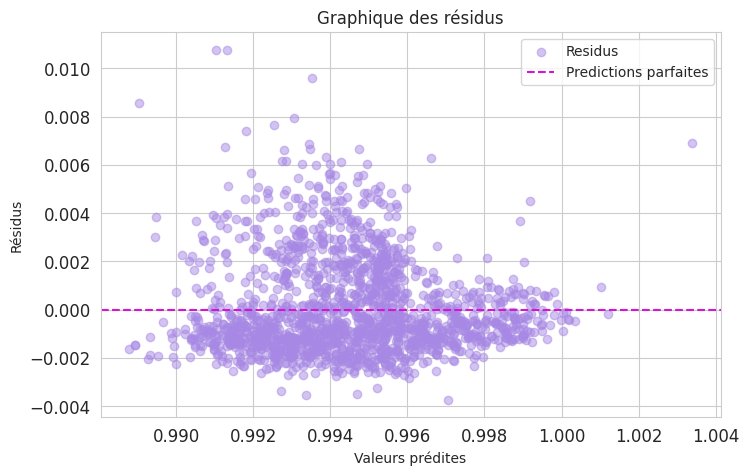

In [19]:
# Création des visualisations
plt.figure(figsize=(8, 5))
# 2. Graphique des résidus
residus = y_test - y_pred_mult
plt.scatter(y_pred_mult, residus, alpha=0.5, label="Residus", color=custom_colors[1])
plt.axhline(y=0, color=custom_colors[2], linestyle="--", label="Predictions parfaites")
plt.xlabel("Valeurs prédites")
plt.ylabel("Résidus")
plt.title("Graphique des résidus")
plt.legend()

Interprétation des coefficients : L’interprétation des coefficients permet de comprendre la contribution de chaque variable à la réponse : un coefficient positif indique qu’une augmentation de cette variable est associée à une augmentation de la prédiction, tandis qu’un coefficient négatif suggère l’effet inverse
Pour le sucre résiduel : un coefficient positif indique qu'une augmentation du sucre résiduel entraîne une augmentation de la densité (Sucre résiduel: 0.000243)
Pour l'alcool : un coefficient négatif indique qu'une augmentation de l'alcool entraîne une diminution de la densité (Alcool: -0.001392)


Les résidus sont globalement centrés autour de zéro, indiquant de bonnes prédictions sans biais apparent. Cependant, quelques valeurs aberrantes sont visibles 

On observe que: La majorité des points sont proches de la droite des prédictions parfaites, ce qui indique une bonne correspondance entre les valeurs réelles et prédites.

# 2. Régression logistique (11 pts)

### Q3. Prédire la couleur (rouge vs blanc) selon le dioxyde de soufre total.
* Quel est l’exactitude (accuracy) obtenu ? La variable « total sulfur dioxide » seule suffit-elle à bien distinguer vins rouges et vins blancs ?
* Comment interpréter le coefficient de régression ? Une variation du SO₂ total rend-elle plus probable que le vin soit blanc ou rouge ?
* La matrice de confusion montre-t-elle un déséquilibre dans la prédiction d’une classe par rapport à l’autre ?
* Serait-il nécessaire d’ajouter d’autres variables explicatives pour améliorer la discrimination entre vins rouges et blancs ?

In [20]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,0


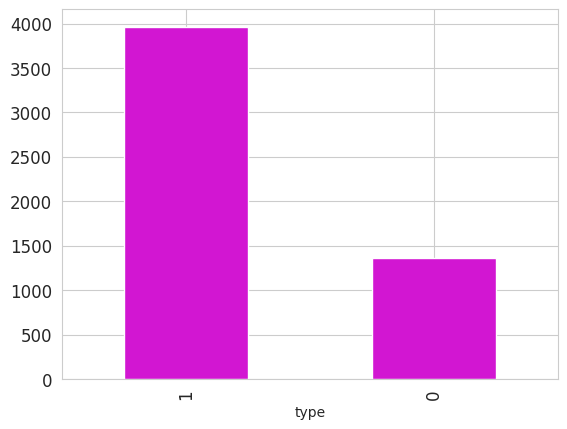

In [21]:
df["type"].value_counts().plot(kind="bar", color=custom_colors[2])
plt.show()

In [22]:
X = df[["total_sulfur_dioxide"]]
y = df["type"]

In [23]:
X.shape, y.shape

((5320, 1), (5320,))

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

lgr_sample = LogisticRegression()
lgr_sample.fit(X_train, y_train)

# Prediction
y_pred_logit = lgr_sample.predict(X_test)

# evaluation du model
result1 = accuracy_score(y_test, y_pred_logit)
print(f"The result of the first logistic regression model is:{result1:.3f}")

The result of the first logistic regression model is:0.909


Intercept: [-4.35278944]
Coefficients: [[0.06229575]]


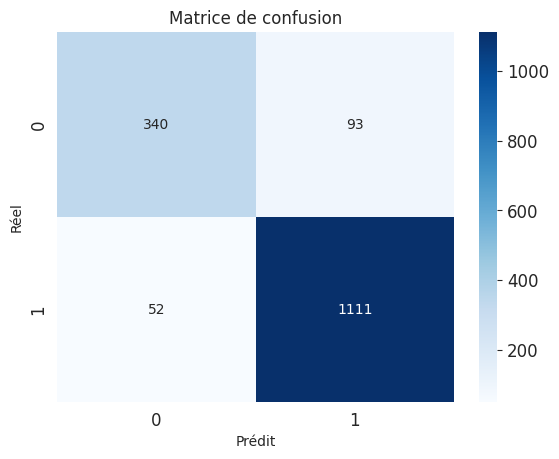

In [25]:
# Coefficients et intercept
print("Intercept:", lgr_sample.intercept_)
print("Coefficients:", lgr_sample.coef_)

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred_logit)
plt.figure()
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matrice de confusion")
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.show()

In [26]:
print(classification_report(y_test, y_pred_logit))

              precision    recall  f1-score   support

           0       0.87      0.79      0.82       433
           1       0.92      0.96      0.94      1163

    accuracy                           0.91      1596
   macro avg       0.90      0.87      0.88      1596
weighted avg       0.91      0.91      0.91      1596



# Q4. Prédire la qualité du vin en mode binante : bon(1) /mauvais (0) avec un seuil de décision de >=7) selon les sulfates, l’acidité volatile et le pH
* Quelle est la performance globale du modèle (accuracy, précision, rappel, F1-score) ? Le modèle fait-il mieux qu’un simple classifieur naïf (constant pour une des deux classes) ?
* Les coefficients de la régression logistique (et leurs exponentielles) indiquent-ils qu’un vin ayant une acidité volatile élevée a plus ou moins de chances d’être considéré comme « bon » ? Même question pour le pH et les sulfates.
* Parmi les trois variables, laquelle semble avoir le plus d’influence sur la probabilité d’un vin d’être classé « bon » ?
* Le modèle a-t-il tendance à manquer certains vins bons (faible rappel sur la classe « bon ») ou à en classer trop (faible précision) ? Peut-on améliorer cet équilibre (par ex. en ajustant le seuil de décision) ?

In [27]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,0


#### Création de la variable cible binaire

In [28]:
df["quality_binary"] = (df["quality"] >= 7).astype(int)
df["quality_binary"].value_counts()

quality_binary
0    4311
1    1009
Name: count, dtype: int64

In [29]:
# Sélection des features
X = df[["volatile_acidity", "pH", "sulphates"]]
y = df["quality_binary"]

In [30]:
# Division train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Entraînement du modèle
model = LogisticRegression()
model.fit(X_train, y_train)

# Prédictions
y_pred = model.predict(X_test)

# Calcul des métriques
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy score: {accuracy:.4f}")
print(f"Precision score: {precision:.4f}")
print(f"Recall score: {recall:.4f}")
print(f"F1 score: {f1:.4f}")

Accuracy score: 0.8058
Precision score: 0.0000
Recall score: 0.0000
F1 score: 0.0000


Métriques de performance:
Accuracy: 0.806
Precision: 0.000
Recall: 0.000
F1-score: 0.000

Accuracy du classifieur naïf: 0.806

Coefficients et Odds Ratios:
            Feature  Coefficient  Odds Ratio
2          Sulfates     1.034439    2.813528
1                pH     0.868494    2.383320
0  Acidité volatile    -2.852920    0.057676


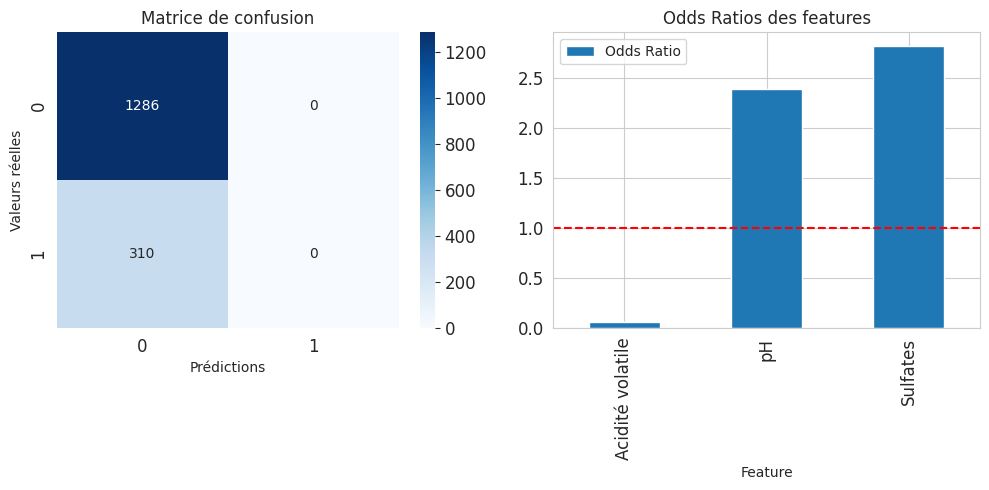

In [31]:
# Création de la variable cible binaire
df["quality_binary"] = (df["quality"] >= 7).astype(int)

# Sélection des features
X = df[["volatile_acidity", "pH", "sulphates"]]
y = df["quality_binary"]

# Division train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Entraînement du modèle
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Prédictions
y_pred = model.predict(X_test)

# Calcul des métriques
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Classifieur naïf (prédire toujours la classe majoritaire)
naive_pred = np.zeros_like(y_test)  # ou ones selon la classe majoritaire
naive_accuracy = accuracy_score(y_test, naive_pred)

# Coefficients et odds ratios
coef_df = pd.DataFrame(
    {
        "Feature": ["Acidité volatile", "pH", "Sulfates"],
        "Coefficient": model.coef_[0],
        "Odds Ratio": np.exp(model.coef_[0]),
    }
)

# Visualisations
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# 1. Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax1)
ax1.set_title("Matrice de confusion")
ax1.set_xlabel("Prédictions")
ax1.set_ylabel("Valeurs réelles")

# 2. Importance des features
coef_df.plot(x="Feature", y="Odds Ratio", kind="bar", ax=ax2)
ax2.set_title("Odds Ratios des features")
ax2.axhline(y=1, color="r", linestyle="--")
plt.tight_layout()

# Affichage des résultats
print("Métriques de performance:")
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-score: {f1:.3f}")
print(f"\nAccuracy du classifieur naïf: {naive_accuracy:.3f}")

print("\nCoefficients et Odds Ratios:")
print(coef_df.sort_values(by="Coefficient", ascending=False))

In [32]:
# Coefficients and Odds Ratios
coefficients = model.coef_[0]
odds_ratios = np.exp(coefficients)


# Display feature importance using coefficients and odds ratios
feature_importance = pd.DataFrame(
    {"Feature": X.columns, "Coefficient": coefficients, "Odds Ratio": odds_ratios}
)
print("\nFeature Importance (Coefficient and Odds Ratio):")
print(feature_importance.sort_values(by="Coefficient", ascending=False))


Feature Importance (Coefficient and Odds Ratio):
            Feature  Coefficient  Odds Ratio
2         sulphates     1.034439    2.813528
1                pH     0.868494    2.383320
0  volatile_acidity    -2.852920    0.057676


# Q5. Prédire la qualité du vin (bon/mauvais, comme dans la Q4) selon l’acide citrique, l’alcool et la densité
* Le modèle atteint-il un meilleur score de classification que le scénario précédent (Q4) ? Ces trois variables se combinent-elles de façon plus informative ?
* Comment interpréter l’effet de l’acide citrique, de l’alcool et de la densité sur la probabilité d’un vin d’être « bon » ? Par exemple, un vin plus alcoolisé a-t-il plus de chances d’être bien noté ?
* La matrice de confusion et les métriques de classification indiquent-elles une meilleure séparation des classes qu’avec un seul prédicteur choisi parmi les trois ?

In [33]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type,quality_binary
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,0,0


Métriques de performance:
Accuracy: 0.817
Precision: 0.578
Recall: 0.216
F1-score: 0.315

Coefficients et Odds Ratios:
       Feature  Coefficient  Odds Ratio
0  citric_acid     1.121471    3.069365
1      alcohol     0.916824    2.501334
2      density    -0.140259    0.869133


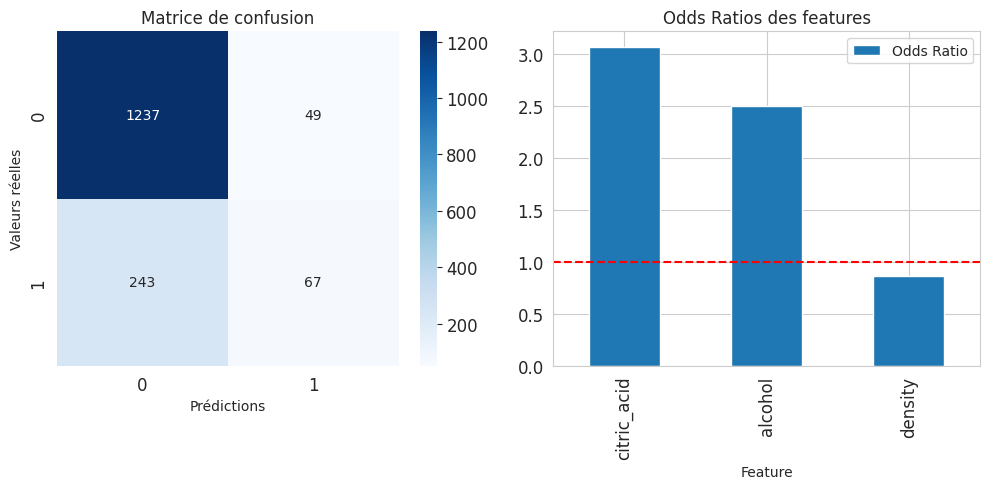

In [34]:
# Création de la variable cible binaire
df["quality_binary"] = (df["quality"] >= 7).astype(int)

# Sélection des features
X = df[["citric_acid", "alcohol", "density"]]
y = df["quality_binary"]

# Division train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


# Entraînement du modèle
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Prédictions
y_pred = model.predict(X_test)

# Calcul des métriques
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# # Classifieur naïf (prédire toujours la classe majoritaire)
# naive_pred = np.zeros_like(y_test)  # ou ones selon la classe majoritaire
# naive_accuracy = accuracy_score(y_test, naive_pred)

# Coefficients et odds ratios
coef_df = pd.DataFrame(
    {
        "Feature": ["citric_acid", "alcohol", "density"],
        "Coefficient": model.coef_[0],
        "Odds Ratio": np.exp(model.coef_[0]),
    }
)

# Visualisations
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# 1. Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax1)
ax1.set_title("Matrice de confusion")
ax1.set_xlabel("Prédictions")
ax1.set_ylabel("Valeurs réelles")

# 2. Importance des features
coef_df.plot(x="Feature", y="Odds Ratio", kind="bar", ax=ax2)
ax2.set_title("Odds Ratios des features")
ax2.axhline(y=1, color="r", linestyle="--")
plt.tight_layout()

# Affichage des résultats
print("Métriques de performance:")
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-score: {f1:.3f}")
# print(f"\nAccuracy du classifieur naïf: {naive_accuracy:.3f}")

print("\nCoefficients et Odds Ratios:")
print(coef_df.sort_values(by="Coefficient", ascending=False))

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.96      0.89      1286
           1       0.58      0.22      0.31       310

    accuracy                           0.82      1596
   macro avg       0.71      0.59      0.60      1596
weighted avg       0.79      0.82      0.78      1596



### Le modèle atteint-il un meilleur score de classification que le scénario précédent (Q4) ? Ces trois variables se combinent-elles de façon plus informative ?
La reponse est oui vu que toutes les matrices d'evaluation c'est sont augmente et on constate aussi beaucoup d'amelioration de ratio de class 0 et 1. Et ces trois variable **(citric_acid, alcohol, et density)** combinent de facons plus informative vu que les score du model s'est beaucoup ameliorer par rapport au cas ci haut.

# 3. Analyse en composantes principales (ACP) : (11 pts)
L’ACP vise à résumer l’information contenue dans un grand nombre de variables corrélées en un nombre réduit de composantes principales, tout en conservant au maximum la variance du jeu de données.<br>
#### Q6. Une ACP sur les quatre variables sucre résiduel, dioxyde de soufre total, acidité volatile, sulphates dont le but est d’observer la séparation des vins par type (blanc/rouge).
* Quelle proportion de la variance totale est expliquée par les deux premières composantes principales ? Cela justifie-t-il l’utilisation d’une représentation 2D ?
* Quelles variables contribuent le plus à la première composante (CP1) et quelles sont celles qui dominent la deuxième (CP2) ? En quoi ces contributions sont-elles cohérentes avec les corrélations observées entre les ariables initiales ?
* Le diagramme 2D dans l’espace (CP1, CP2) montre-t-il une séparation plus nette entre vins rouges et vins blancs que dans l’espace original ? Les deux clusters de couleurs se superposent-ils ou observez-vous une
tendance à la ségrégation ?
* Les points représentant les vins se regroupent-ils selon certains gradients (par exemple, un axe allant de vins « pauvres en SO₂ total » et « faibles en sucre résiduel » à des vins « plus riches en SO₂ total ») ?
* Cette projection permet-elle d’identifier des outliers ?

#### * Quelle proportion de la variance totale est expliquée par les deux premières composantes principales ? Cela justifie-t-il l’utilisation d’une représentation 2D ?

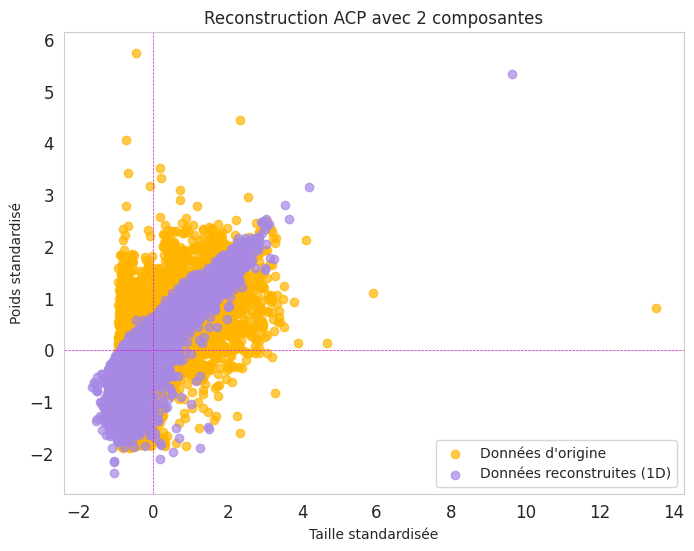

Proportion de la variance expliquée par composante :
Composante 1: 0.47
Composante 2: 0.22
Total de la variance explquée : 0.69


In [36]:
# Appliquer ACP avec les 2 CP
X = df[["residual_sugar", "total_sulfur_dioxide", "volatile_acidity", "sulphates"]]
scaler = StandardScaler()


data_scaled = scaler.fit_transform(X)
pca_full = PCA(n_components=2)
components = pca_full.fit_transform(data_scaled)

# Reconstruire les données depuis CP1 + CP2
reconstructed_full = pca_full.inverse_transform(components)

# Visualiser les données d'origine, puis les reconstruites
plt.figure(figsize=(8, 6))
plt.scatter(
    data_scaled[:, 0],
    data_scaled[:, 1],
    alpha=0.7,
    label="Données d'origine",
    color=custom_colors[3],
)
plt.scatter(
    reconstructed_full[:, 0],
    reconstructed_full[:, 1],
    alpha=0.7,
    label="Données reconstruites (1D)",
    color=custom_colors[1],
)
plt.axhline(0, color=custom_colors[2], linestyle="--", linewidth=0.5)
plt.axvline(0, color=custom_colors[2], linestyle="--", linewidth=0.5)
plt.title("Reconstruction ACP avec 2 composantes")
plt.xlabel("Taille standardisée")
plt.ylabel("Poids standardisé")
plt.legend()
plt.grid()
plt.show()

# La variance expliquée
print("Proportion de la variance expliquée par composante :")
for i, var_ratio in enumerate(pca_full.explained_variance_ratio_):
    print(f"Composante {i+1}: {var_ratio:.2f}")
print(f"Total de la variance explquée : {sum(pca_full.explained_variance_ratio_):.2f}")

#### * Quelles variables contribuent le plus à la première composante (CP1) et quelles sont celles qui dominent la  deuxième (CP2) ? En quoi ces contributions sont-elles cohérentes avec les corrélations observées entre les variables initiales ?

In [37]:
features = ["residual_sugar", "total_sulfur_dioxide", "volatile_acidity", "sulphates"]
X = df[features]
scaler = StandardScaler()


X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
explained_variance = pca.explained_variance_ratio_

In [38]:
# Calcul de la proportion de variance expliquée par les deux premières composantes principales
explained_variance_df = pd.DataFrame(
    {"Component": ["PC1", "PC2"], "Explained Variance (%)": explained_variance * 100}
)

# Affichage de la proportion de variance expliquée
explained_variance_df

,Component,Explained Variance (%)
0,PC1,47.289943
1,PC2,22.056645


In [39]:
# Contribution des variables aux composantes principales
pca_contributions = pd.DataFrame(
    pca.components_, columns=features, index=["PC1", "PC2"]
)

# Affichage
print(pca_contributions)

     residual_sugar  total_sulfur_dioxide  volatile_acidity  sulphates
PC1        0.497593              0.607720         -0.467970  -0.405070
PC2        0.643852              0.203747          0.431429   0.598173


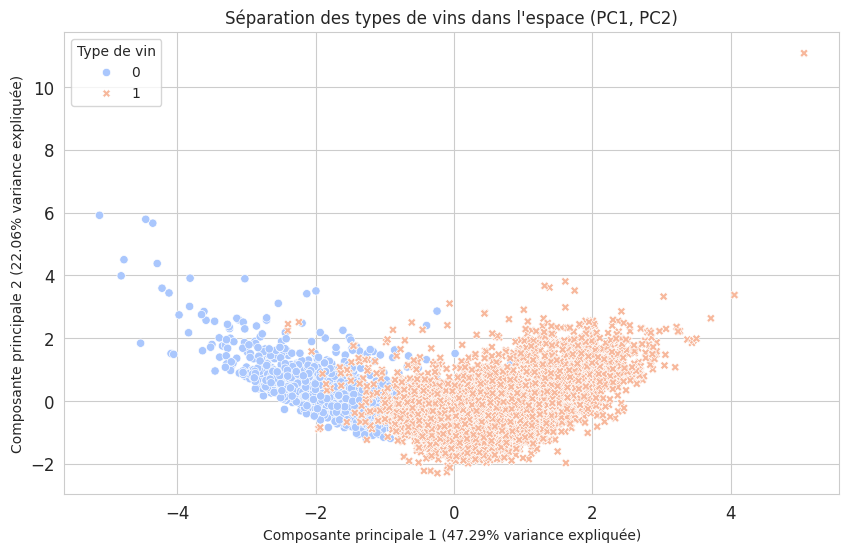

In [40]:
# Étape 2 : Sélection des variables pour l'ACP
features = ["residual_sugar", "total_sulfur_dioxide", "volatile_acidity", "sulphates"]
X = df[features]

# Étape 3 : Standardisation des variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Étape 4 : Exécution de l'ACP
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Ajout des composantes principales au dataset
df["PCA1"] = X_pca[:, 0]
df["PCA2"] = X_pca[:, 1]

# Étape 5 : Visualisation des résultats
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x="PCA1",
    y="PCA2",
    hue="type",
    style="type",
    palette="coolwarm",
    color=custom_colors[1],
)
plt.title("Séparation des types de vins dans l'espace (PC1, PC2)")
plt.xlabel(
    f"Composante principale 1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance expliquée)"
)
plt.ylabel(
    f"Composante principale 2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance expliquée)"
)
plt.legend(title="Type de vin")
plt.grid(True)
plt.show()

#### *Les points représentant les vins se regroupent-ils selon certains gradients (par exemple, un axe allant de vins «pauvres en SO₂ total » et « faibles en sucre résiduel » à des vins « plus riches en SO₂ total ») ?


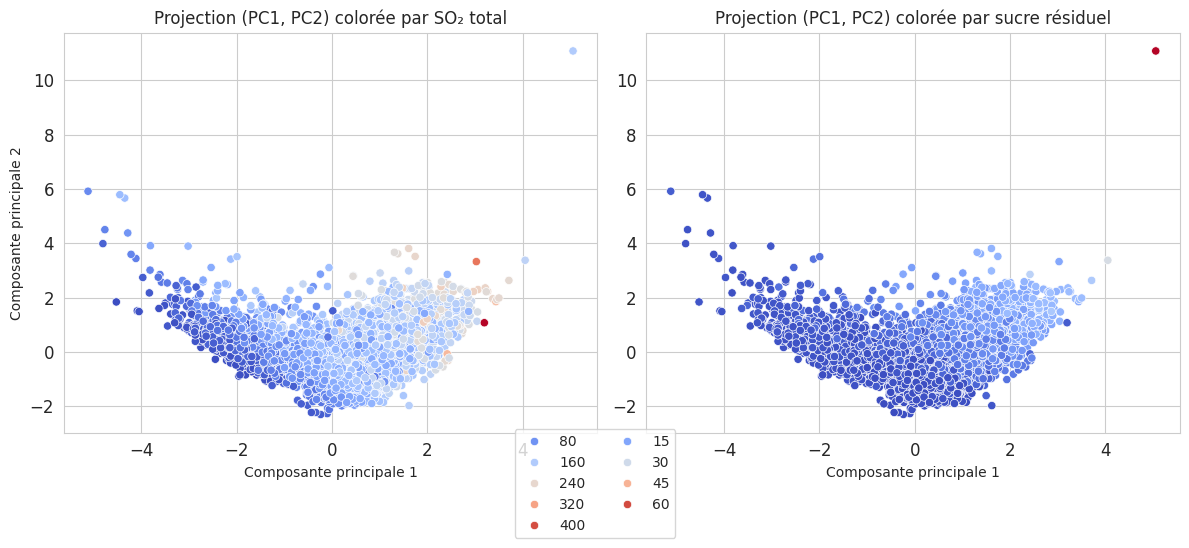

In [41]:
# Création de la figure avec deux sous-graphiques côte à côte
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Premier sous-graphique : SO₂ total
scatter1 = sns.scatterplot(
    x="PCA1",
    y="PCA2",
    hue="total_sulfur_dioxide",
    palette="coolwarm",
    data=df,
    ax=axes[0],
)
axes[0].set_title("Projection (PC1, PC2) colorée par SO₂ total")
axes[0].set_xlabel("Composante principale 1")
axes[0].set_ylabel("Composante principale 2")
scatter1.legend_.remove()  # Supprime la légende du premier sous-graphe

# Deuxième sous-graphique : Sucre résiduel
scatter2 = sns.scatterplot(
    x="PCA1", y="PCA2", hue="residual_sugar", palette="coolwarm", data=df, ax=axes[1]
)
axes[1].set_title("Projection (PC1, PC2) colorée par sucre résiduel")
axes[1].set_xlabel("Composante principale 1")
axes[1].set_ylabel("")  # Supprime le label y pour éviter la redondance
scatter2.legend_.remove()  # Supprime la légende du deuxième sous-graphe

# Ajout d'une légende commune en bas
handles1, labels1 = scatter1.get_legend_handles_labels()
handles2, labels2 = scatter2.get_legend_handles_labels()
fig.legend(
    handles1 + handles2,
    labels1 + labels2,
    loc="lower center",
    bbox_to_anchor=(0.5, -0.1),
    ncol=2,
)

plt.tight_layout()
plt.show()

Les graphiques PCA montrent que :

1. Le SO₂ total présente un gradient clair de gauche à droite (PC1), avec les concentrations les plus faibles à gauche et les plus élevées à droite.

2. Le sucre résiduel ne montre pas de gradient net, avec une distribution plus uniforme des valeurs, sauf quelques points isolés à forte teneur.

Il n'y a donc pas de gradient combiné entre ces deux paramètres - ils semblent varier indépendamment l'un de l'autre.

### * Cette projection permet-elle d’identifier des outliers ?

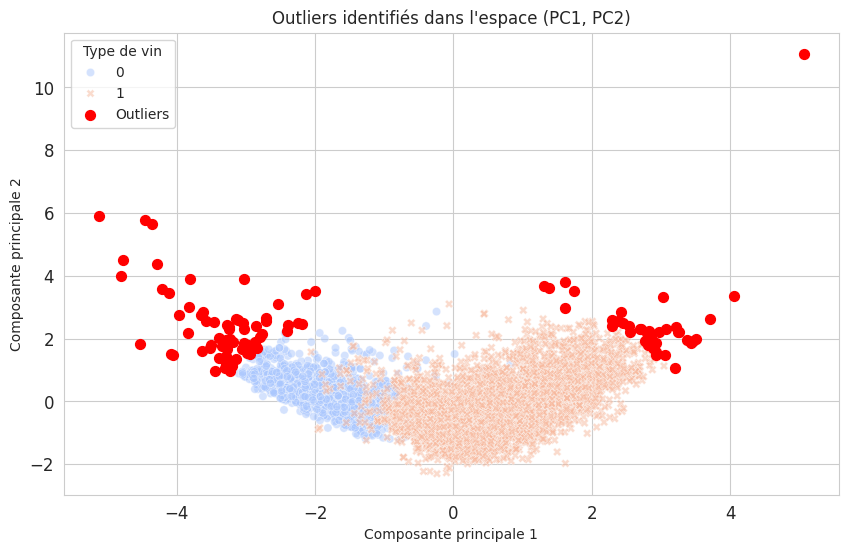

,type,PCA1,PCA2,distance_from_origin
13,0,-4.809450,3.984408,6.245504
17,0,-3.612768,2.848786,4.600834
38,0,-3.452250,0.953094,3.581399
43,0,-3.972487,2.738735,4.825072
69,0,-3.497319,1.798094,3.932478
...,...,...,...,...
5218,1,2.419041,2.851980,3.739726
5329,1,2.844404,2.172925,3.579418
6344,1,3.196648,1.072521,3.371774
6391,1,-2.241726,2.510773,3.365905


In [42]:
# Étape 1 : Calcul de la distance des points par rapport à l'origine
df["distance_from_origin"] = (df["PCA1"] ** 2 + df["PCA2"] ** 2) ** 0.5

# Étape 2 : Définir un seuil pour détecter les outliers (ici, les 2% des points les plus éloignés)
outlier_threshold = df["distance_from_origin"].quantile(0.98)
outliers = df[df["distance_from_origin"] > outlier_threshold]

# Étape 3 : Visualiser les outliers sur le graphique ACP
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x="PCA1",
    y="PCA2",
    hue="type",
    style="type",
    palette="coolwarm",
    alpha=0.5,
    color=custom_colors[2],
)
plt.scatter(outliers["PCA1"], outliers["PCA2"], color="red", label="Outliers", s=50)
plt.title("Outliers identifiés dans l'espace (PC1, PC2)")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.legend(title="Type de vin")
plt.grid(True)
plt.show()

# Étape 4 : Affichage des informations sur les outliers
outliers_info = outliers[["type", "PCA1", "PCA2", "distance_from_origin"]]
outliers_info

Identification des outliers :
Les points rouges sur le graphique représentent les outliers identifiés comme étant éloignés des clusters principaux dans l’espace des composantes principales.
Ces points peuvent correspondre à des observations atypiques en termes de caractéristiques chimiques.


# Q7. On rajoute aux variables de l’ACP de la Q6, le pH.
* L’ajout du pH modifie-t-il de façon significative la répartition de la variance expliquée par les deux premières composantes principales ?
* Les contributions des variables aux CPs ont-elles changé ? Le pH renforce-t-il une certaine dimension (un
sous-ensemble de variables dont la contribution augmente alors que l’effet attendu est une diminution
générale) ? Se trouve-t-il « corrélé » à l’une des composantes déjà existantes ?

### *  L’ajout du pH modifie-t-il de façon significative la répartition de la variance expliquée par les deux premières composantes principales ?

In [43]:
# Étape 1 : Ajouter la variable pH et recalculer l'ACP
X_with_pH = df[
    ["residual_sugar", "total_sulfur_dioxide", "volatile_acidity", "sulphates", "pH"]
]

# Standardisation des données
X_scaled_with_pH = scaler.fit_transform(X_with_pH)

# Exécution de l'ACP avec pH
pca_with_pH = PCA(n_components=2)
X_pca_with_pH = pca_with_pH.fit_transform(X_scaled_with_pH)

# Calcul de la variance expliquée par les deux premières composantes
explained_variance_with_pH = pca_with_pH.explained_variance_ratio_

# Résultats de la proportion de variance expliquée
explained_variance_with_pH_df = pd.DataFrame(
    {
        "Component": ["PC1", "PC2"],
        "Explained Variance (%)": explained_variance_with_pH * 100,
    }
)

explained_variance_with_pH_df

,Component,Explained Variance (%)
0,PC1,41.391058
1,PC2,17.683536


Le pH ne modifie pas significativement la structure de l'ACP :
- Sur PC1 : contribution modérée (+0.39)
- Sur PC2 : contribution faible (+0.11)

Les variables dominantes restent le SO₂ total et le sucre résiduel pour PC1, et les sulfates pour PC2.

### * Sur la représentation 2D, constate-t-on une meilleure séparation visuelle entre vins rouges et blancs ? Le pH clarifie-t-il la structure ?

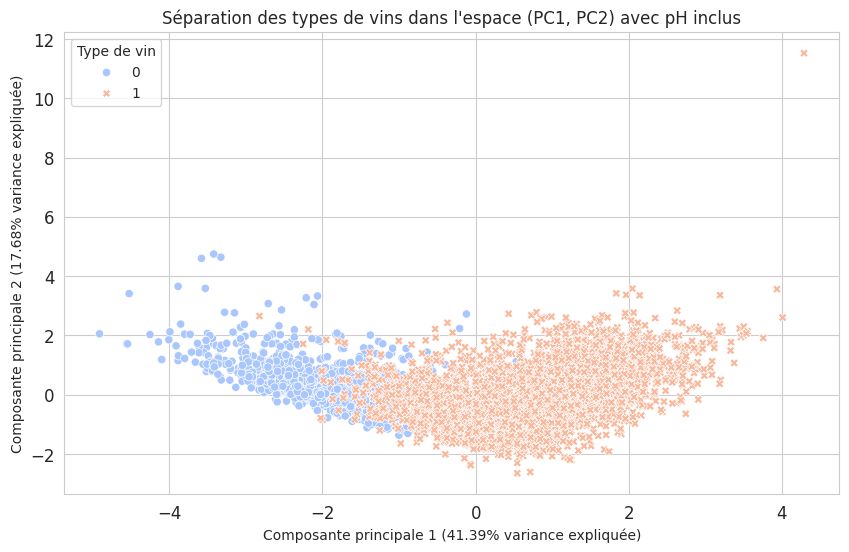

In [44]:
# Ajout des nouvelles composantes principales au dataset
df["PCA1_with_pH"] = X_pca_with_pH[:, 0]
df["PCA2_with_pH"] = X_pca_with_pH[:, 1]

# Visualisation : Diagramme 2D avec pH inclus
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x="PCA1_with_pH",
    y="PCA2_with_pH",
    hue="type",
    style="type",
    palette="coolwarm",
)
plt.title("Séparation des types de vins dans l'espace (PC1, PC2) avec pH inclus")
plt.xlabel(
    f"Composante principale 1 ({explained_variance_with_pH[0]*100:.2f}% variance expliquée)"
)
plt.ylabel(
    f"Composante principale 2 ({explained_variance_with_pH[1]*100:.2f}% variance expliquée)"
)
plt.legend(title="Type de vin")
plt.grid(True)
plt.show()

Les vecteurs de projection des variables montrent que le pH contribue davantage à PC1 (positivement).
Ils montrent que les vins blancs sont davantage associés à des niveaux élevés de sucre résiduel et de SO₂ total, tandis que les vins rouges sont liés à des niveaux plus élevés de sulphates et à un pH différent. Ces associations reflètent leurs caractéristiques chimiques distinctes et permettent de mieux comprendre les différences entre les types de vins.


# Q8. Dans l’ensemble de la Q6, on remplace l’acidité volatile par l’acidité fixe
* L’acidité fixe met-elle en évidence des axes dans les nuages de point séparant plus clairement les deux types
de vins ?
* Ce remplacement modifie-t-il la répartition de la variance sur les deux premières CP ?
* Les variables qui contribuaient fortement aux axes dans la Q6 gardent-elles un rôle similaire ou l’acidité
fixe modifie-t-elle significativement l’orientation des axes principaux ?
* La visualisation 2D présente-t-elle une séparation plus nette ou moins nette entre les types de vins qu’à la Q6 ? Quelles peuvent être les raisons de ce changement, sachant que l’acidité fixe a un profil de variabilité différent de l’acidité volatile ?

#### * L’acidité fixe met-elle en évidence des axes dans les nuages de point séparant plus clairement les deux types de vins ?

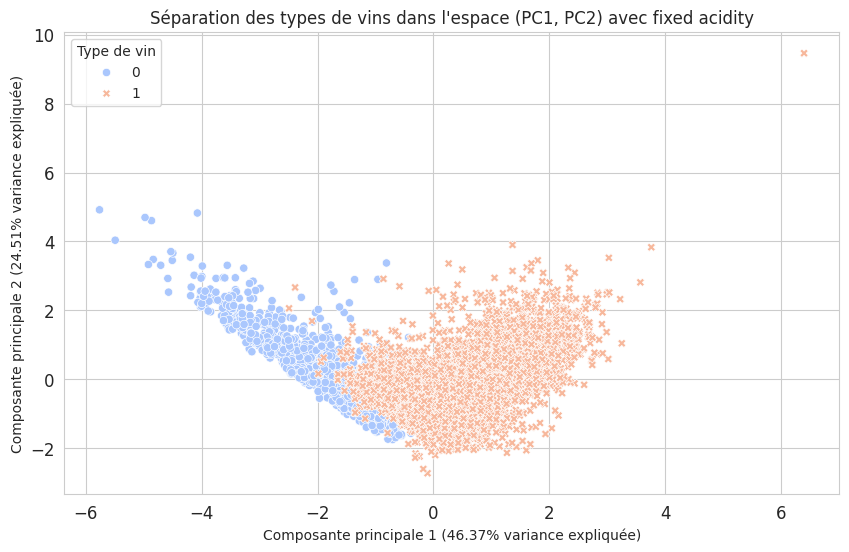

In [51]:
# Remplacement de volatile acidity par fixed acidity
X_with_fixed_acidity = df[
    ["residual_sugar", "total_sulfur_dioxide", "fixed_acidity", "sulphates"]
]

# Standardisation des données
X_scaled_with_fixed_acidity = scaler.fit_transform(X_with_fixed_acidity)

# Exécution de l'ACP avec fixed acidity
pca_with_fixed_acidity = PCA(n_components=2)
X_pca_with_fixed_acidity = pca_with_fixed_acidity.fit_transform(
    X_scaled_with_fixed_acidity
)

# Ajout des nouvelles composantes principales au dataset
df["PCA1_fixed"] = X_pca_with_fixed_acidity[:, 0]
df["PCA2_fixed"] = X_pca_with_fixed_acidity[:, 1]

# Visualisation des clusters avec fixed acidity
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x="PCA1_fixed",
    y="PCA2_fixed",
    hue="type",
    style="type",
    palette="coolwarm",
)
plt.title("Séparation des types de vins dans l'espace (PC1, PC2) avec fixed acidity")
plt.xlabel(
    f"Composante principale 1 ({pca_with_fixed_acidity.explained_variance_ratio_[0]*100:.2f}% variance expliquée)"
)
plt.ylabel(
    f"Composante principale 2 ({pca_with_fixed_acidity.explained_variance_ratio_[1]*100:.2f}% variance expliquée)"
)
plt.legend(title="Type de vin")
plt.grid(True)
plt.show()

Oui, l'acidité fixe améliore la séparation visuelle entre vins rouges et blancs. Dans la projection, les clusters pour les deux types de vins sont plus distincts avec moins de chevauchements. L'acidité fixe semble mieux refléter les différences structurelles et chimiques entre les types de vins que l'acidité volatile.


#### * Ce remplacement modifie-t-il la répartition de la variance sur les deux premières CP ?

In [54]:
explained_variance_fixed_acidity = pca_with_fixed_acidity.explained_variance_ratio_

explained_variance_fixed_acidity_df = pd.DataFrame(
    {
        "Component": ["PC1", "PC2"],
        "Explained Variance (%)": explained_variance_fixed_acidity * 100,
    }
)
explained_variance_fixed_acidity_df

,Component,Explained Variance (%)
0,PC1,46.366931
1,PC2,24.506800


En comparant les deux variances, on voit que le PC1 avec l’acidité volatile(Q6, PC1= 47,28) 
est légèrement supérieure à celui avec l’acide fixe (PC1 = 46,36). Et pour le PC2, on a une supériorité de celui avec l’acide fixe (PC2 = 24,50) par rapport au PC2 avec l’acide volatile (Q6, PC2 = 22,05).
 Donc il y’a bel et bien une modification au niveau de la répartition de la variance.



In [62]:
# Contributions des variables avec fixed acidity
pca_contributions_with_fixed_acidity = pd.DataFrame(
    pca_with_fixed_acidity.components_,  # Les composantes principales
    columns=[
        "residual_sugar",
        "total_sulfur_dioxide",
        "fixed_acidity",
        "sulphates",
    ],  # Noms des colonnes
    index=["PC1", "PC2"],  # Noms des lignes (composantes principales)
)

# Transposer pour voir les contributions par variable
pca_contributions_with_fixed_acidity.T

,PC1,PC2
residual_sugar,0.487559,0.630988
total_sulfur_dioxide,0.596326,0.260855
fixed_acidity,-0.449433,0.567928
sulphates,-0.452429,0.459637


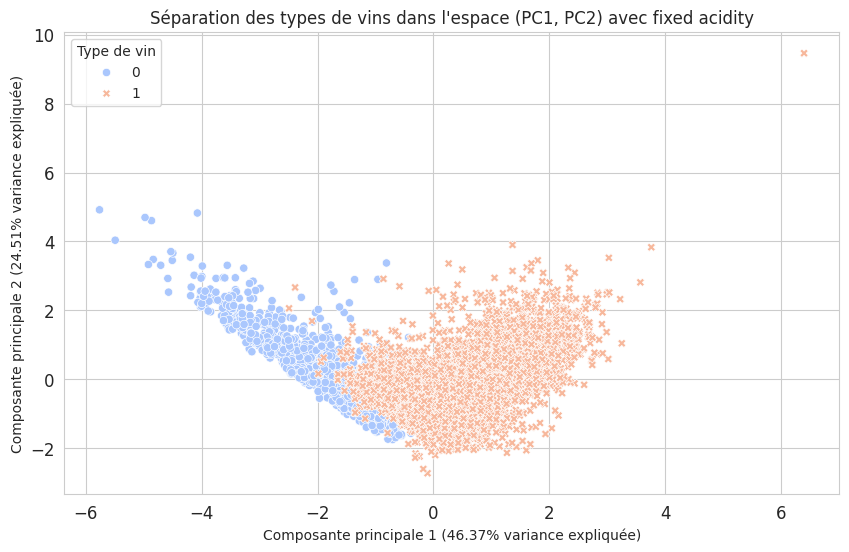

In [63]:
# Visualisation : Diagramme 2D avec fixed acidity
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x="PCA1_fixed",
    y="PCA2_fixed",
    hue="type",
    style="type",
    palette="coolwarm",
)
plt.title("Séparation des types de vins dans l'espace (PC1, PC2) avec fixed acidity")
plt.xlabel(
    f"Composante principale 1 ({pca_with_fixed_acidity.explained_variance_ratio_[0]*100:.2f}% variance expliquée)"
)
plt.ylabel(
    f"Composante principale 2 ({pca_with_fixed_acidity.explained_variance_ratio_[1]*100:.2f}% variance expliquée)"
)
plt.legend(title="Type de vin")
plt.grid(True)
plt.show()

Séparation visuelle :


La visualisation 2D dans la Q8 (avec acidité fixe) présente une séparation plus nette entre les types de vins rouges et blancs par rapport à la Q6 (avec acidité volatile).
Dans la Q8, les clusters rouges et blancs montrent moins de chevauchement, ce qui indique une meilleure différenciation.
Raisons de ce changement :


L'acidité fixe capture des aspects structurels et chimiques des vins qui sont plus représentatifs des différences entre les rouges et les blancs que l'acidité volatile.
L'acidité fixe est moins influencée par des variations volatiles ou temporaires, offrant une dimension plus stable pour distinguer les types de vins.
La redistribution des contributions des variables dans l'ACP (notamment la forte influence de l'acidité fixe sur CP2) a également permis de mieux structurer les clusters.
En définitive, la courbe Q8 (acidité fixe) offre une séparation plus claire des types de vins, grâce au remplacement de l'acidité volatile par l'acidité fixe, qui reflète mieux les différences chimiques stables entre rouges et blancs.
